
# 数据生成

## 这个数据集 是随机生成的一个dataset. 
## 用来讲解CNN 是如何分类图片

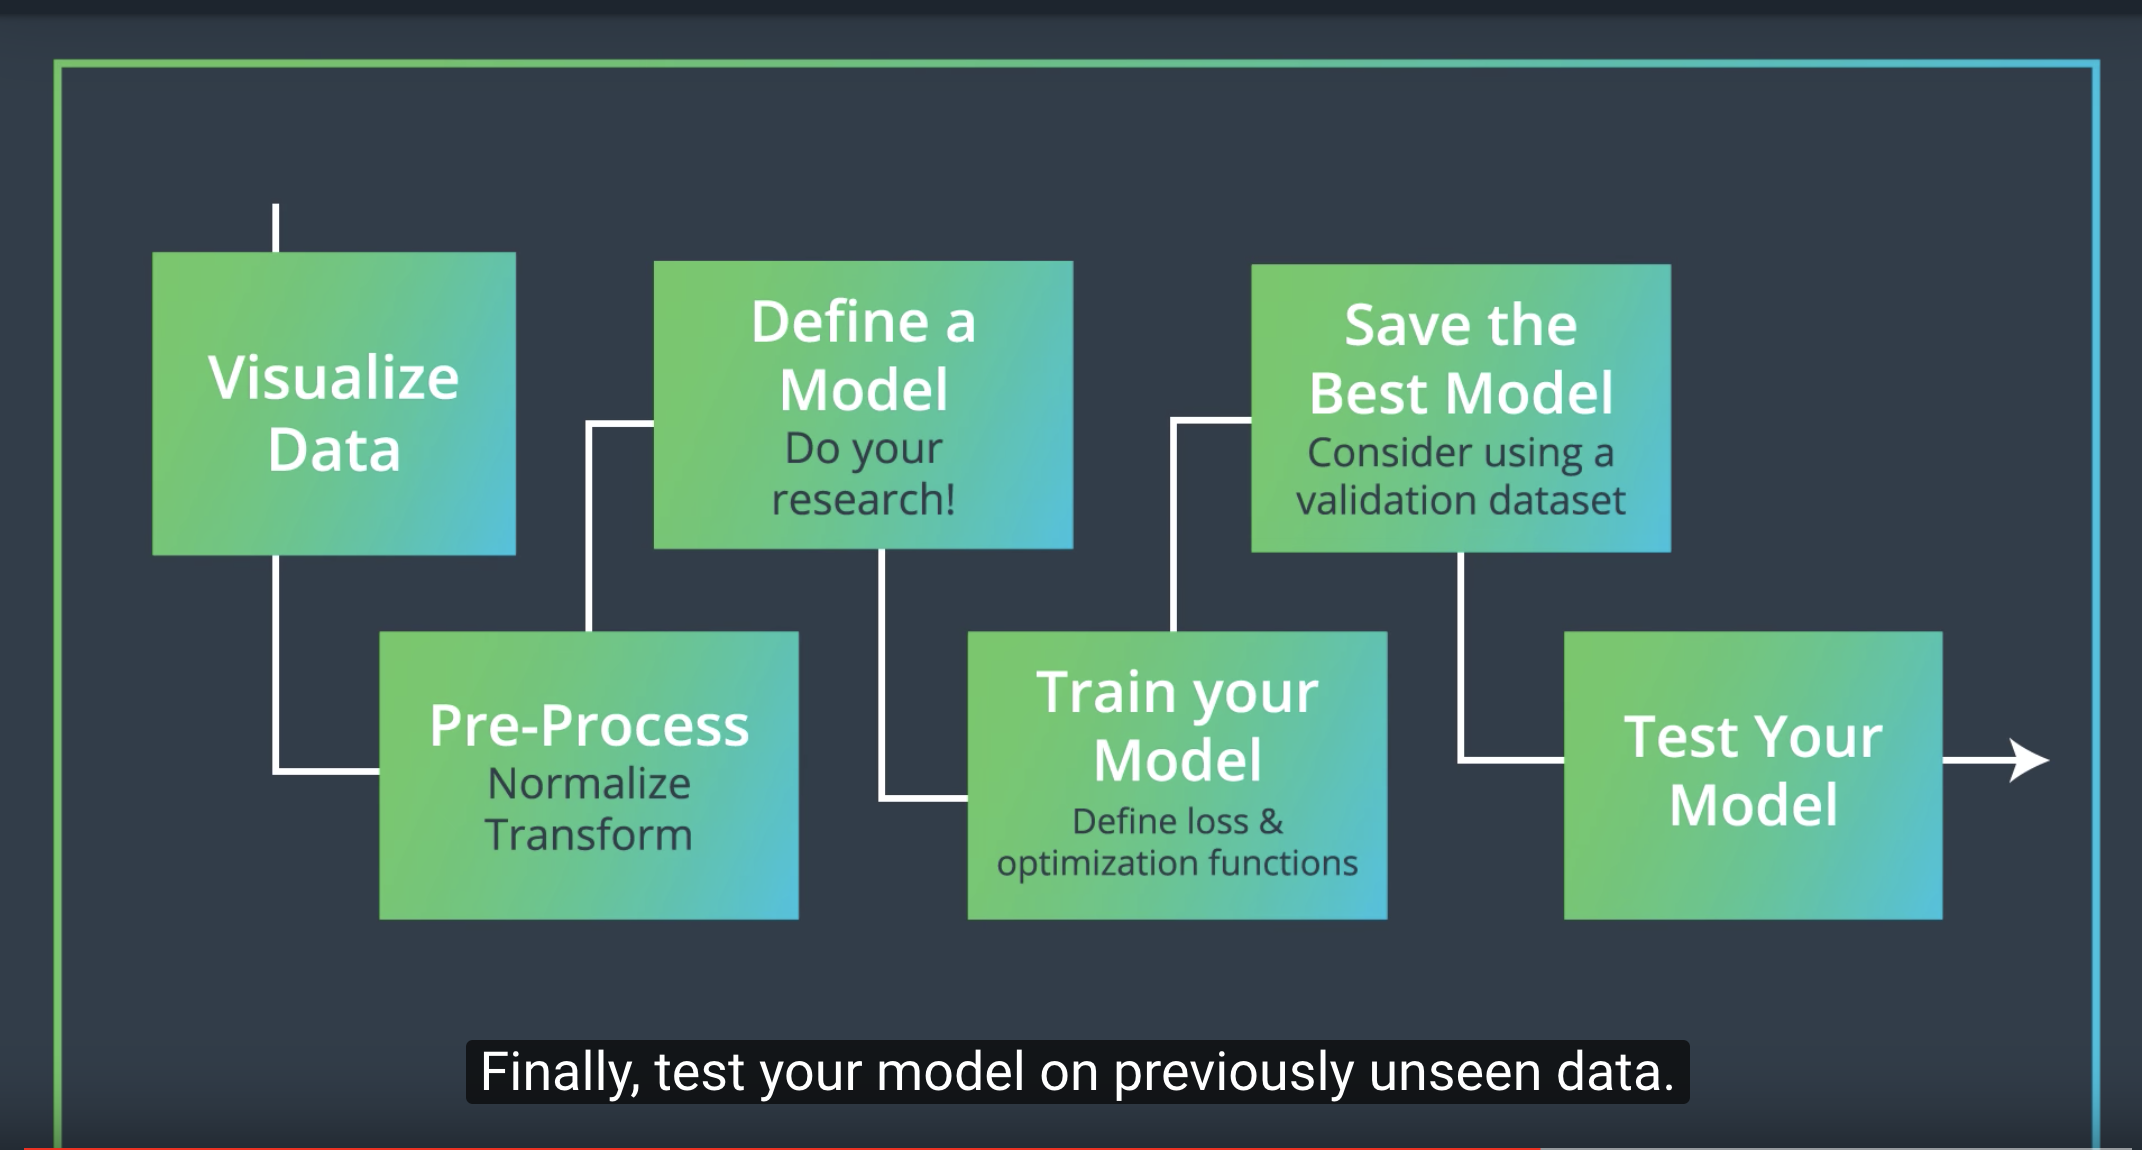

In [1]:
import keras
import numpy as np
import random



## 

number_of_samples=2500; # 我们这里产生250张图片
nb_samples=number_of_samples;
frame_row=32; # 我们横着像素是 32个pixels
frame_col=32; # 竖着也是 32个pixel ~ 没错正方形会更好！
channels=3; # 什么事channel ,这就是 三种颜色啊~ RGB ,问题来了，如果是灰色呢？ 我们应该选什么呢？

#### ！！！1 就好了


data= np.random.random((2500,frame_row,frame_col,channels)) # 这个就是data的生成啊~
#  维度是 2500，3通道，横，竖 各32pixel



label=np.array([np.random.randint(0,2) for i in range(2500)]).reshape(-1,1) # 随机生成对应的  labels ， 
#reshape的话！把他变成 竖的结构！
np.random.seed(224)
## 上面的数据就 X 是tensor ，y还不是哈！





Using TensorFlow backend.
/anaconda3/envs/tf/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [5]:
x_train,y_train = data[:2000],label[:2000]
x_test,y_test = data[2000:],label[2000:]

# Input

In [13]:
y_train.shape


(2000, 1)

# 模型搭建

In [14]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten, Dense, Dropout
from keras import losses

model = Sequential()

model.add(Conv2D(16,(3,3),padding = 'same',input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64*4*4))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(2))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________

# 练习~

In [16]:
from keras.utils import np_utils
# ont_hot
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [17]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

from keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(filepath='CV.weights.best.hdf5',verbose=1,save_best_only=True)

hist = model.fit(x_train,y_train,epochs=50,batch_size=32,verbose=1,validation_split=0.2,shuffle=True,callbacks=[cp])




Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/50
1600/1600 [==============================] - 6s 3ms/step - loss: 0.7636 - acc: 0.4919 - val_loss: 0.6933 - val_acc: 0.5050

Epoch 00001: val_loss improved from inf to 0.69334, saving model to CV.weights.best.hdf5
Epoch 2/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6924 - acc: 0.4719 - val_loss: 0.6974 - val_acc: 0.4950

Epoch 00002: val_loss did not improve from 0.69334
Epoch 3/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6955 - acc: 0.5231 - val_loss: 0.6932 - val_acc: 0.4950

Epoch 00003: val_loss improved from 0.69334 to 0.69317, saving model to CV.weights.best.hdf5
Epoch 4/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4950

Epoch 00004: val_loss did not improve from 0.69317
Epoch 5/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.693

1600/1600 [==============================] - 5s 3ms/step - loss: 0.5047 - acc: 0.2219 - val_loss: 0.8795 - val_acc: 0.5575

Epoch 00043: val_loss did not improve from 0.69317
Epoch 44/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4695 - acc: 0.2056 - val_loss: 1.8530 - val_acc: 0.5425

Epoch 00044: val_loss did not improve from 0.69317
Epoch 45/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4872 - acc: 0.2319 - val_loss: 0.7114 - val_acc: 0.5375

Epoch 00045: val_loss did not improve from 0.69317
Epoch 46/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6488 - acc: 0.3387 - val_loss: 0.7256 - val_acc: 0.5250

Epoch 00046: val_loss did not improve from 0.69317
Epoch 47/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6446 - acc: 0.3531 - val_loss: 0.7433 - val_acc: 0.5325

Epoch 00047: val_loss did not improve from 0.69317
Epoch 48/50
1600/1600 [==============================] - 6s 4ms/step - loss: 

In [18]:
model.load_weights('CV.weights.best.hdf5')

In [19]:
y_pred = model.predict_classes(x_test)

In [21]:
model.evaluate(x_test,y_test)[1]

500/500 [==============================] - 0s 616us/step


0.48800000047683717